In [ ]:
# Import th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("diabetes.csv")

# Ki·ªÉm tra s∆° b·ªô
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [15]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_features:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} gi√° tr·ªã b·∫±ng 0")

Glucose: 5 gi√° tr·ªã b·∫±ng 0
BloodPressure: 35 gi√° tr·ªã b·∫±ng 0
SkinThickness: 227 gi√° tr·ªã b·∫±ng 0
Insulin: 374 gi√° tr·ªã b·∫±ng 0
BMI: 11 gi√° tr·ªã b·∫±ng 0


In [7]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_features] = df[zero_features].replace(0, np.nan)

In [8]:
for col in zero_features:
    median = df[col].median()
    df[col] = df[col].fillna(median)

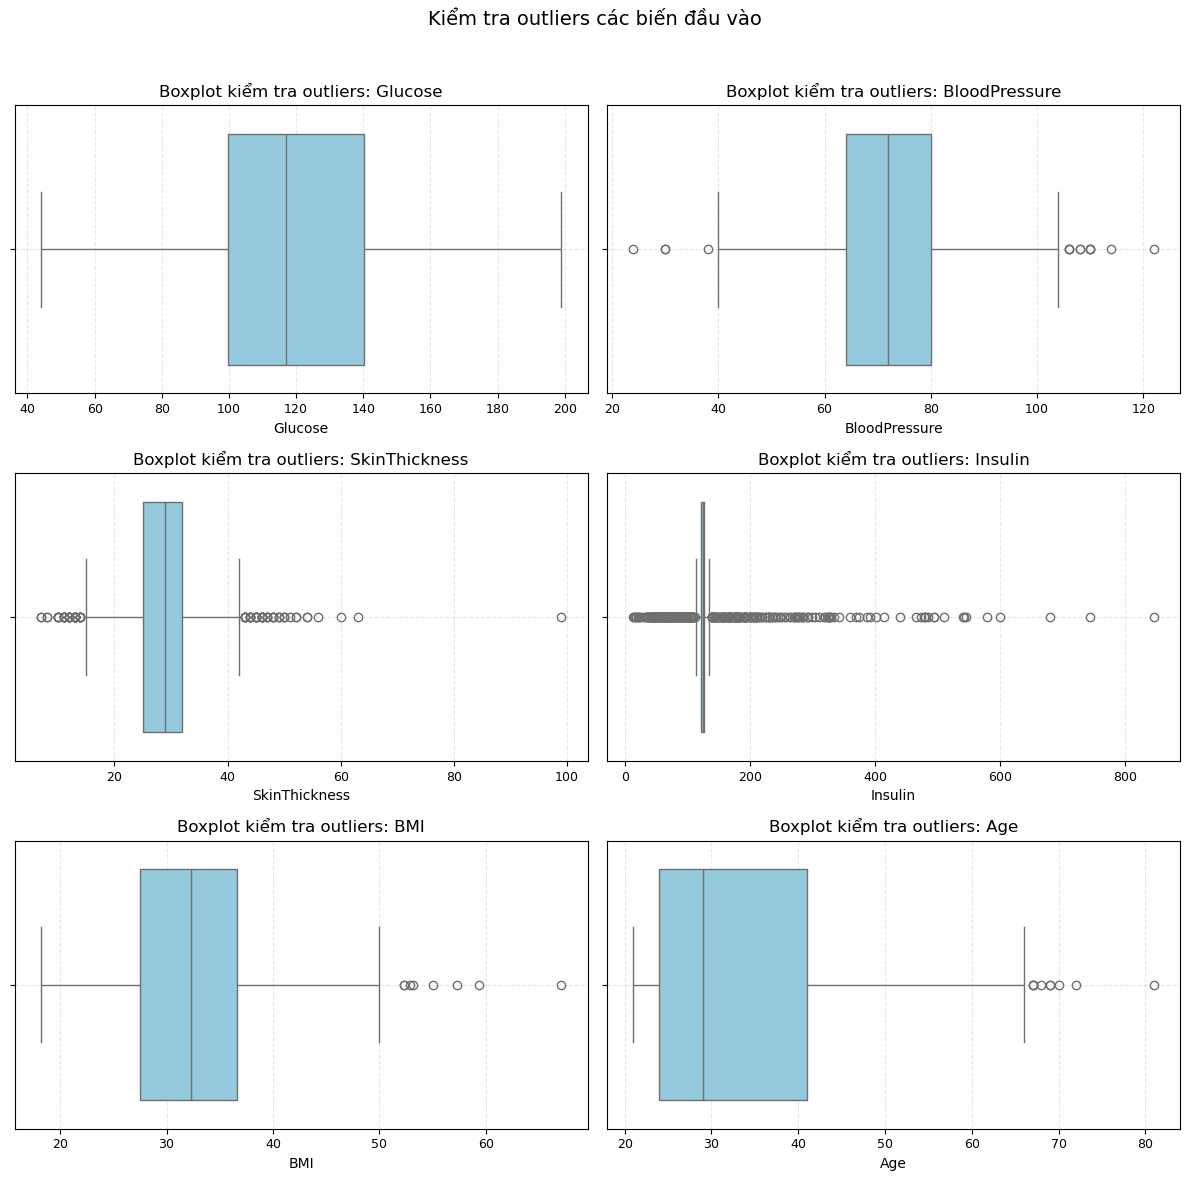

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh s√°ch c√°c bi·∫øn c·∫ßn ki·ªÉm tra
columns = zero_features + ['Age']

cols = 2  # üëâ 2 bi·ªÉu ƒë·ªì m·ªói h√†ng
rows = (len(columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for idx, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Boxplot ki·ªÉm tra outliers: {col}', fontsize=12)
    axes[idx].tick_params(axis='x', labelsize=9)
    axes[idx].grid(True, linestyle='--', alpha=0.3)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Ki·ªÉm tra outliers c√°c bi·∫øn ƒë·∫ßu v√†o', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("outlier.pdf", dpi=300)
plt.show()

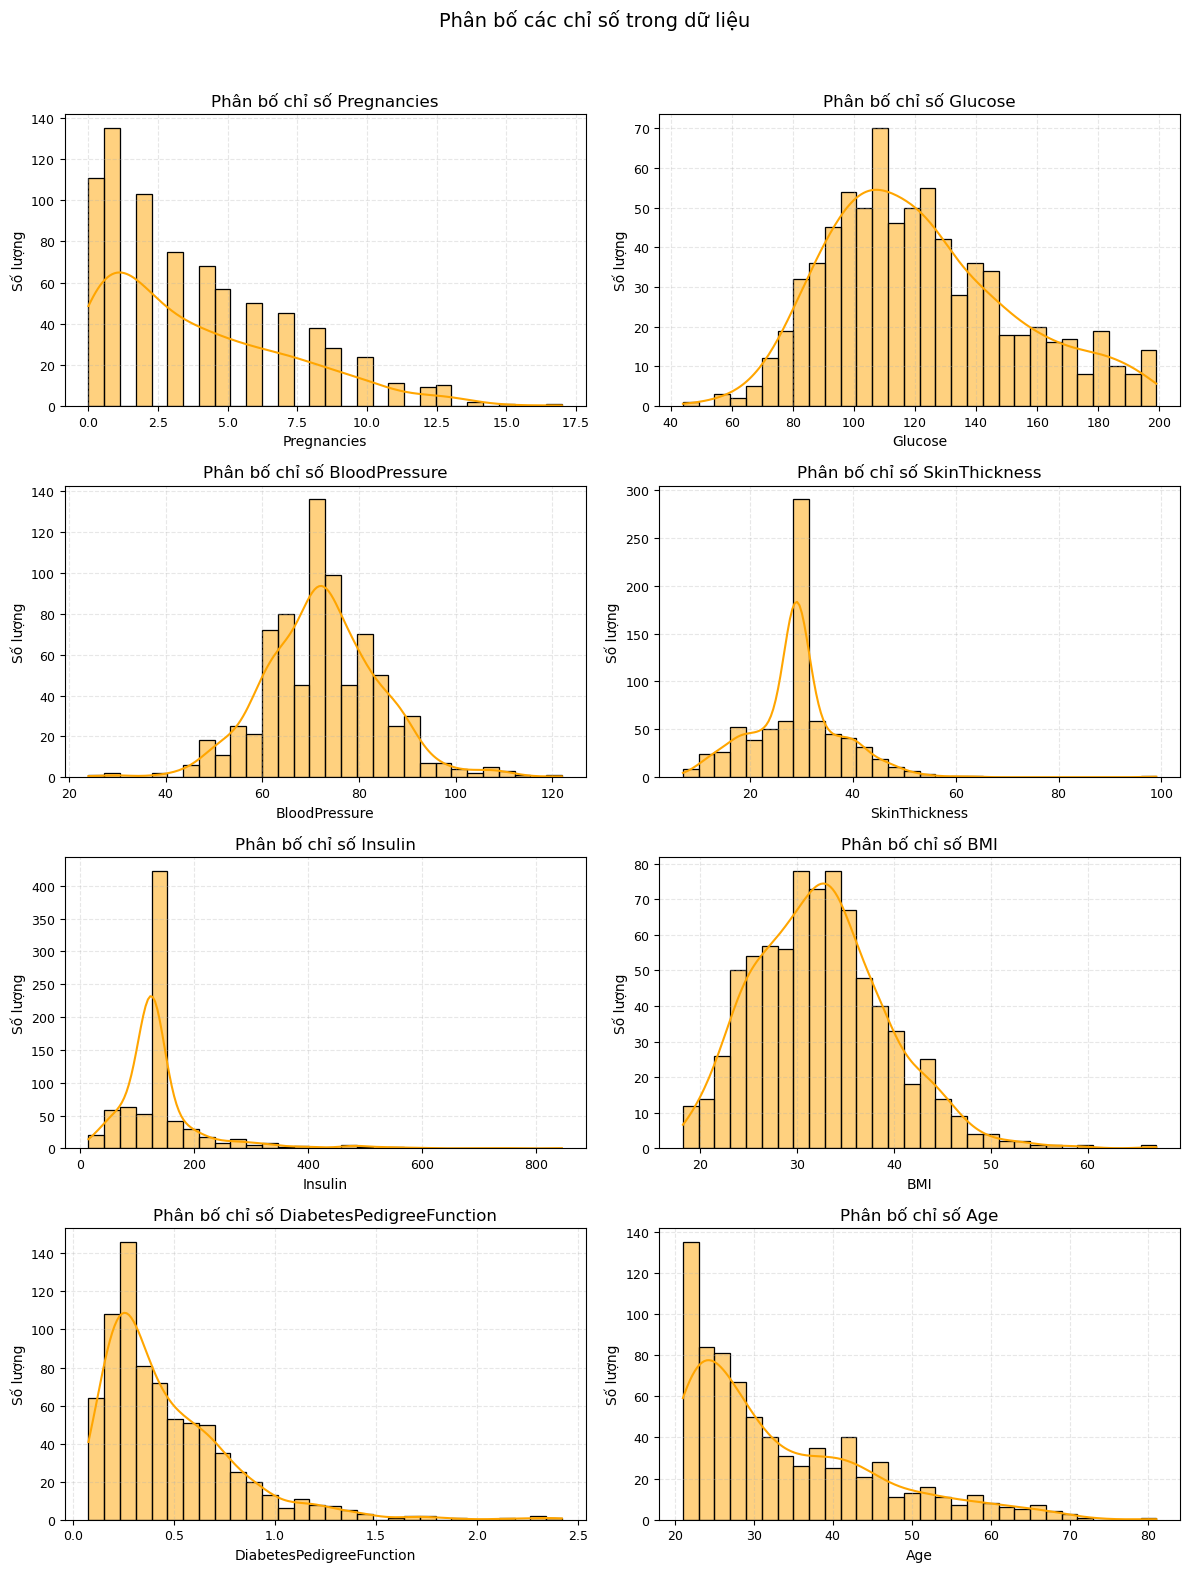

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

cols = 2  # üëâ 2 bi·ªÉu ƒë·ªì m·ªói h√†ng
rows = (len(columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for idx, col in enumerate(columns):
    sns.histplot(df[col], kde=True, bins=30, color='orange', ax=axes[idx])
    axes[idx].set_title(f'Ph√¢n b·ªë ch·ªâ s·ªë {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('S·ªë l∆∞·ª£ng', fontsize=10)
    axes[idx].tick_params(axis='both', labelsize=9)
    axes[idx].grid(True, linestyle='--', alpha=0.3)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Ph√¢n b·ªë c√°c ch·ªâ s·ªë trong d·ªØ li·ªáu', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("1.png", dpi=300)
plt.show()

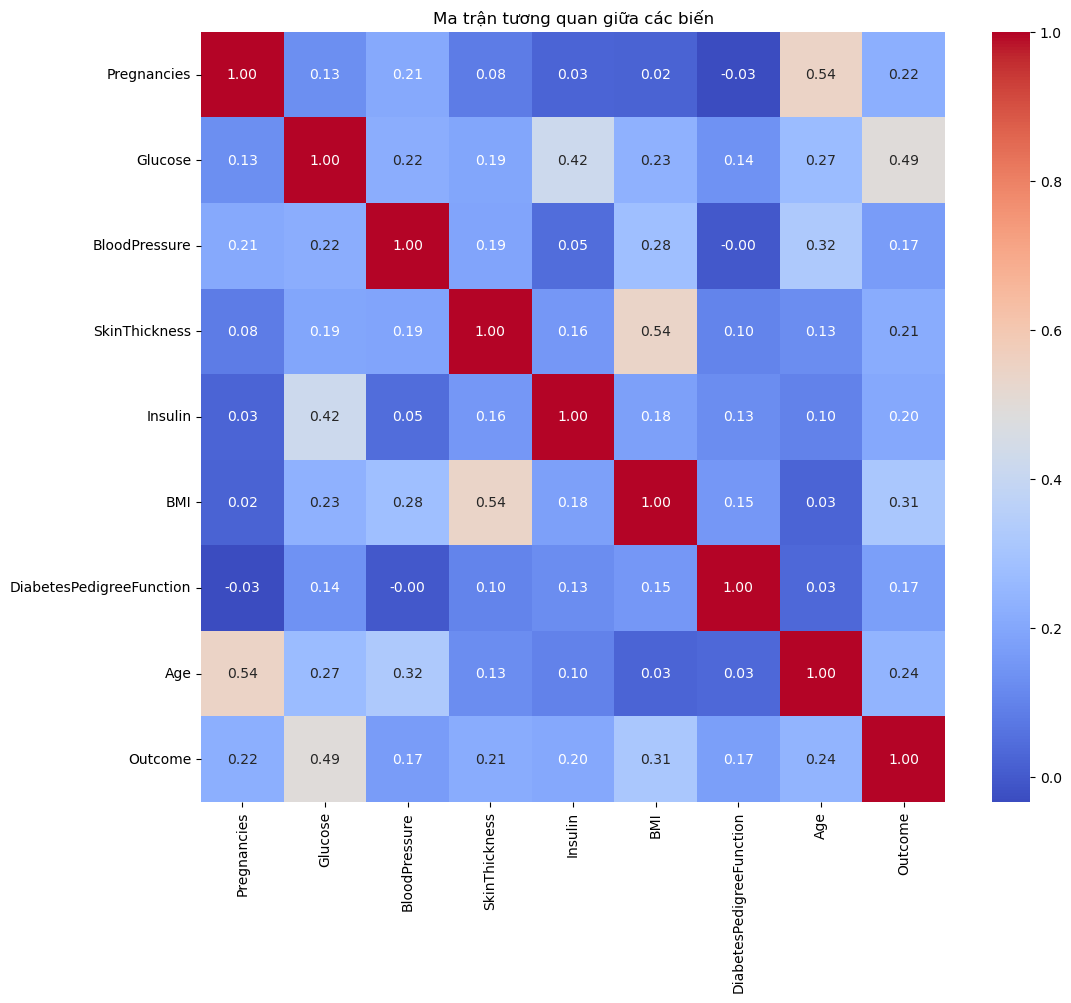

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
plt.savefig("2.png", dpi=300)
plt.show()

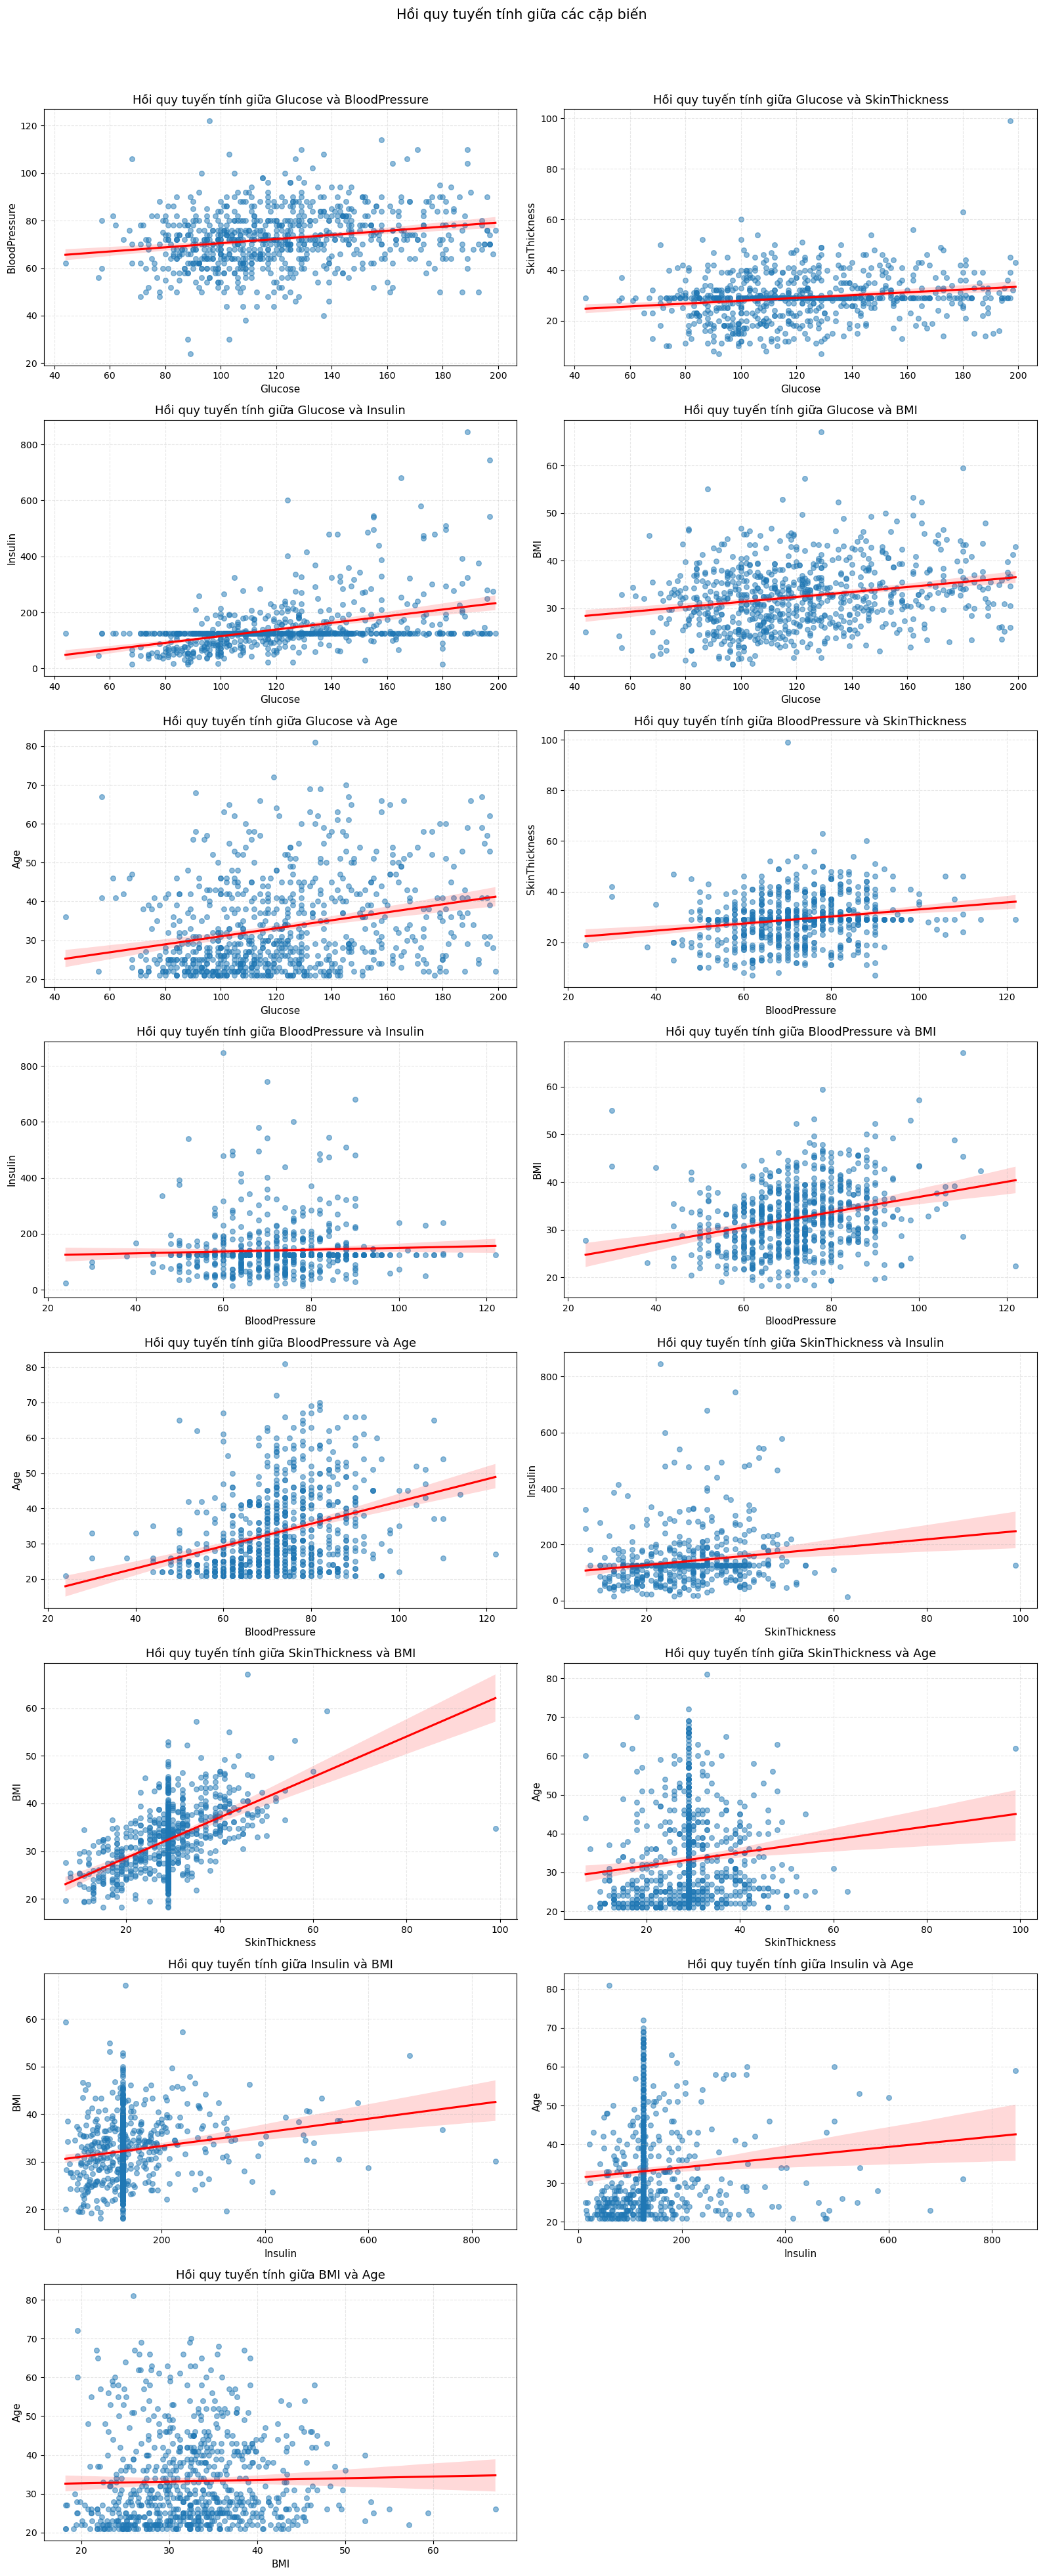

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# C√°c bi·∫øn c·∫ßn so s√°nh
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# T·∫°o danh s√°ch c√°c c·∫∑p bi·∫øn kh√¥ng tr√πng nhau
pairs = [(features[i], features[j]) for i in range(len(features)) for j in range(i+1, len(features))]

# C·∫•u h√¨nh l∆∞·ªõi: 2 bi·ªÉu ƒë·ªì m·ªói h√†ng
cols = 2
rows = (len(pairs) + cols - 1) // cols

# T·∫°o khung subplot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))
axes = axes.flatten()

# V·∫Ω t·ª´ng bi·ªÉu ƒë·ªì h·ªìi quy
for idx, (x, y) in enumerate(pairs):
    sns.regplot(x=x, y=y, data=df,
                scatter_kws={'alpha':0.5, 's':30},
                line_kws={'color':'red'},
                ax=axes[idx])
    axes[idx].set_title(f'H·ªìi quy tuy·∫øn t√≠nh gi·ªØa {x} v√† {y}', fontsize=13)
    axes[idx].set_xlabel(x, fontsize=11)
    axes[idx].set_ylabel(y, fontsize=11)
    axes[idx].tick_params(axis='both', labelsize=10)
    axes[idx].grid(True, linestyle='--', alpha=0.3)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

# Ti√™u ƒë·ªÅ t·ªïng
plt.suptitle('H·ªìi quy tuy·∫øn t√≠nh gi·ªØa c√°c c·∫∑p bi·∫øn', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("3.png", dpi=300)
plt.show()

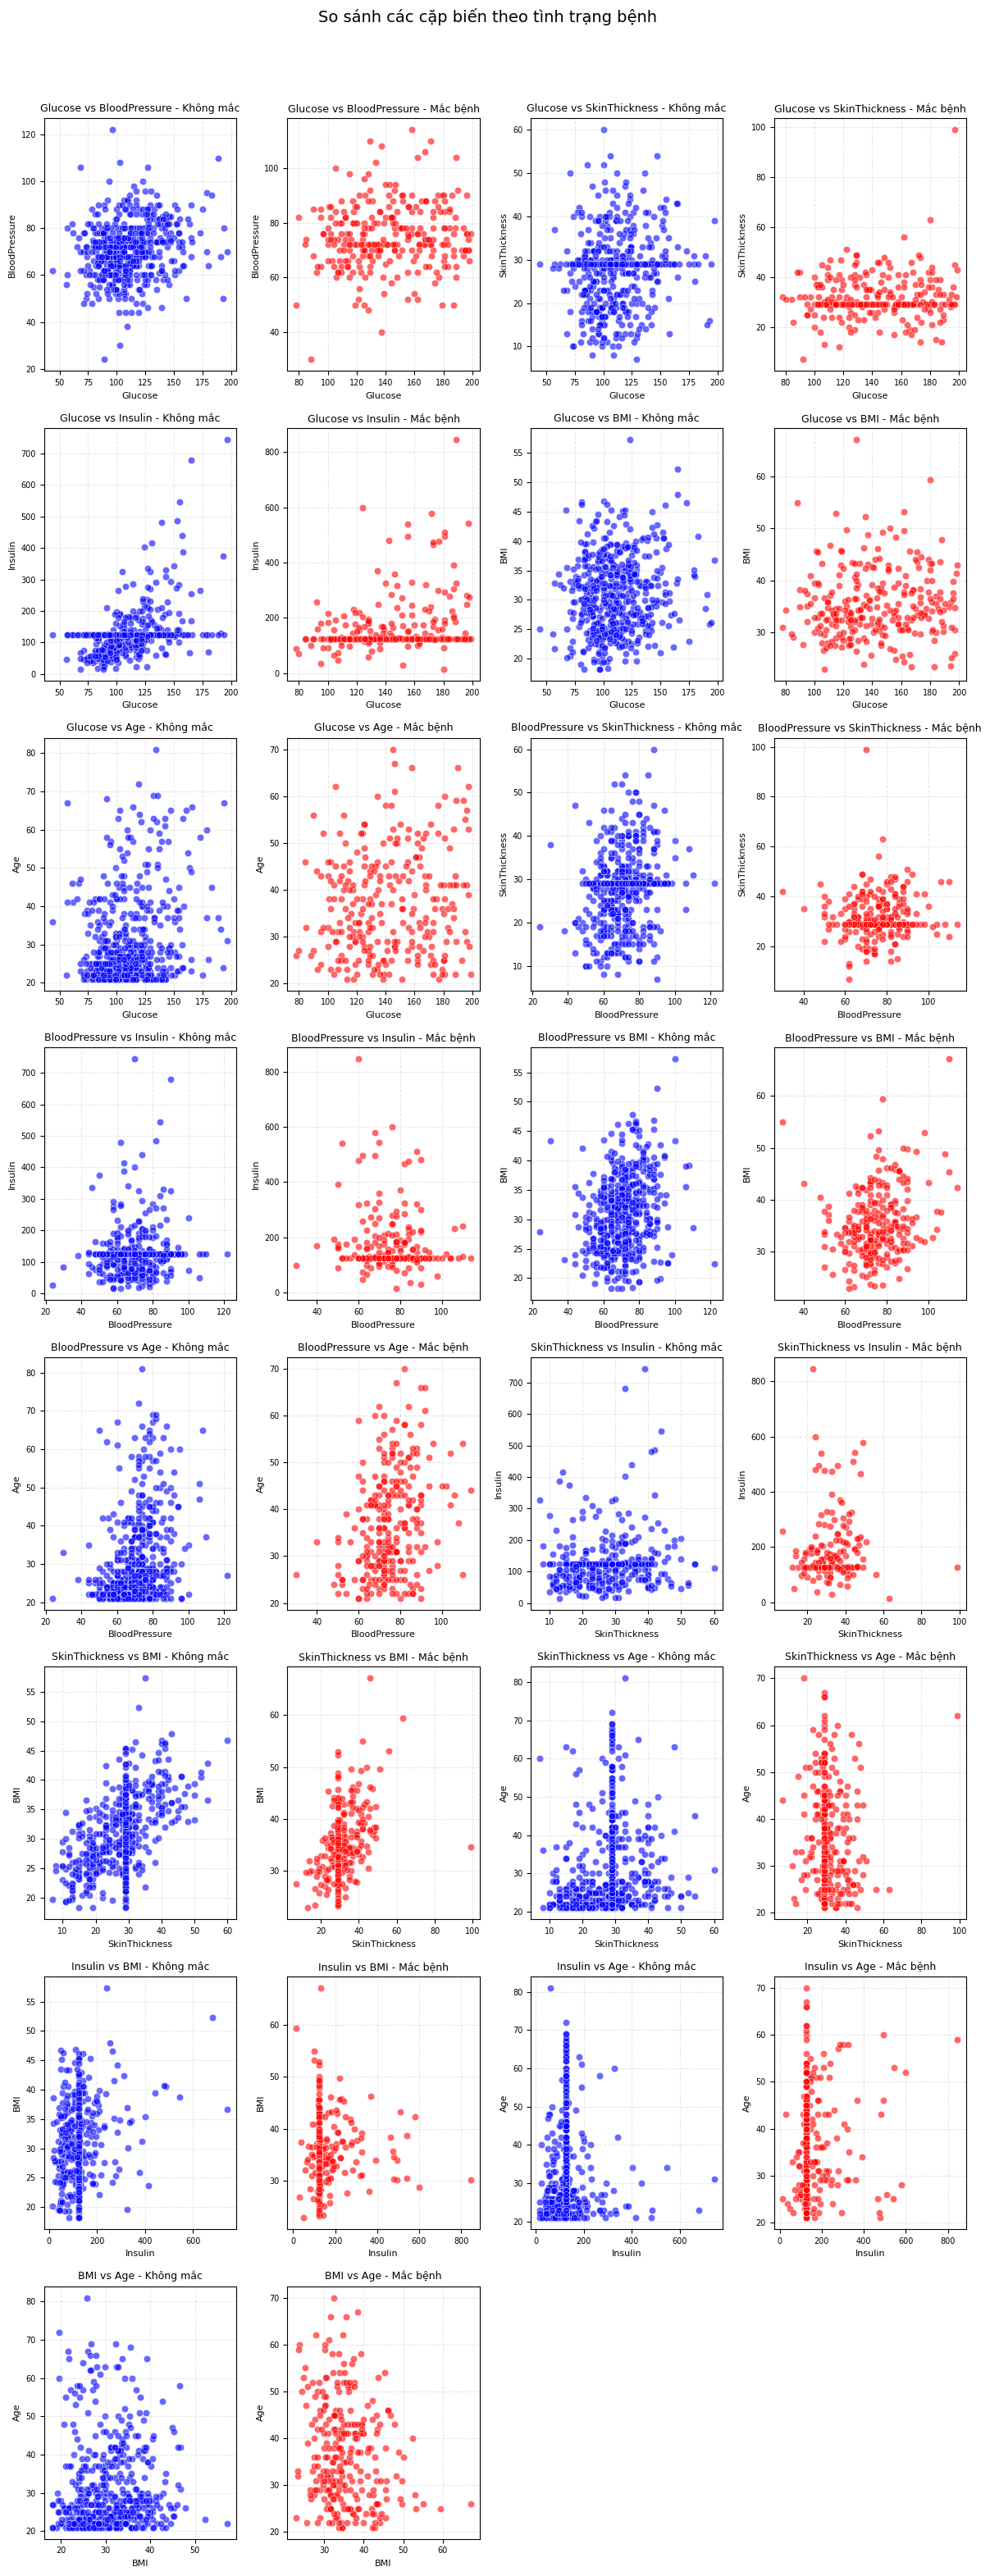

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
pairs = [(features[i], features[j]) for i in range(len(features)) for j in range(i+1, len(features))]

cols = 2  # s·ªë c·∫∑p m·ªói h√†ng (m·ªói c·∫∑p g·ªìm 2 bi·ªÉu ƒë·ªì)
rows = (len(pairs) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols * 2, figsize=(cols * 6, rows * 4), sharex=False, sharey=False)
axes = axes.flatten()

for idx, (x, y) in enumerate(pairs):
    ax1 = axes[idx * 2]
    ax2 = axes[idx * 2 + 1]

    sns.scatterplot(x=x, y=y, data=df[df['Outcome']==0], ax=ax1, color='blue', alpha=0.6)
    ax1.set_title(f'{x} vs {y} - Kh√¥ng m·∫Øc', fontsize=9)
    ax1.set_xlabel(x, fontsize=8)
    ax1.set_ylabel(y, fontsize=8)
    ax1.tick_params(labelsize=7)
    ax1.grid(True, linestyle='--', alpha=0.3)

    sns.scatterplot(x=x, y=y, data=df[df['Outcome']==1], ax=ax2, color='red', alpha=0.6)
    ax2.set_title(f'{x} vs {y} - M·∫Øc b·ªánh', fontsize=9)
    ax2.set_xlabel(x, fontsize=8)
    ax2.set_ylabel(y, fontsize=8)
    ax2.tick_params(labelsize=7)
    ax2.grid(True, linestyle='--', alpha=0.3)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(idx * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('So s√°nh c√°c c·∫∑p bi·∫øn theo t√¨nh tr·∫°ng b·ªánh', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("4.png", dpi=300)
plt.show()

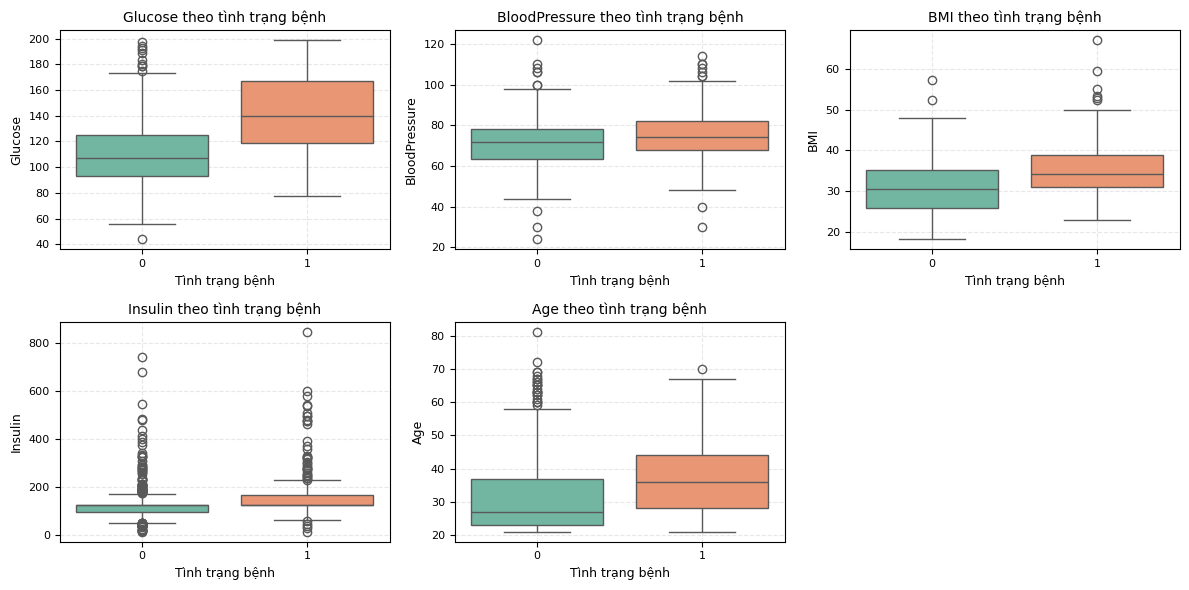

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']
cols = 3  # s·ªë bi·ªÉu ƒë·ªì m·ªói h√†ng
rows = (len(features) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Outcome', y=col, hue='Outcome', data=df,
                palette='Set2', dodge=False, ax=axes[i])
    axes[i].set_title(f'{col} theo t√¨nh tr·∫°ng b·ªánh', fontsize=10)
    axes[i].set_xlabel('T√¨nh tr·∫°ng b·ªánh', fontsize=9)
    axes[i].set_ylabel(col, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].legend([], [], frameon=False)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("5.png", dpi=300)
plt.show()

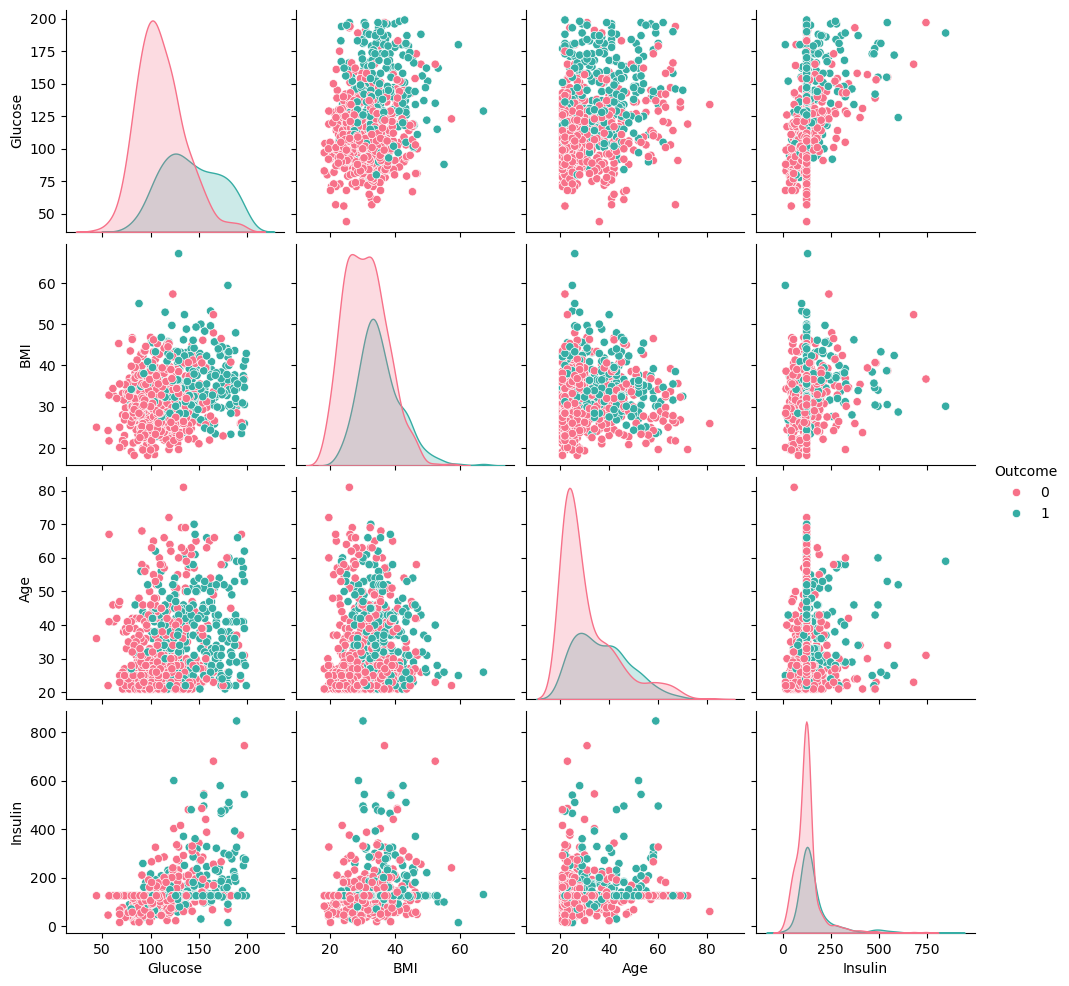

In [24]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='husl')

In [25]:
grouped = df.groupby('Outcome').mean()
print(grouped)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164  


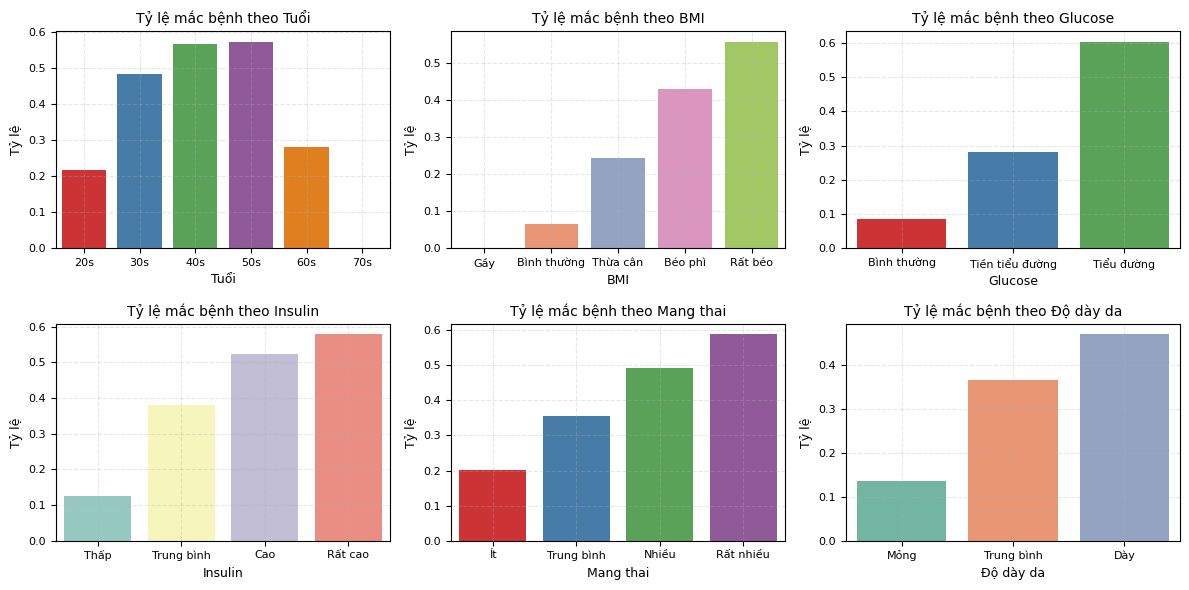

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªãnh nghƒ©a c√°c nh√≥m ph√¢n lo·∫°i
group_definitions = {
    'AgeGroup': {
        'column': 'Age',
        'bins': [20, 30, 40, 50, 60, 70, 80],
        'labels': ['20s', '30s', '40s', '50s', '60s', '70s'],
        'palette': 'Set1',
        'title': 'Tu·ªïi'
    },
    'BMIGroup': {
        'column': 'BMI',
        'bins': [0, 18.5, 25, 30, 40, 60],
        'labels': ['G·∫ßy', 'B√¨nh th∆∞·ªùng', 'Th·ª´a c√¢n', 'B√©o ph√¨', 'R·∫•t b√©o'],
        'palette': 'Set2',
        'title': 'BMI'
    },
    'GlucoseGroup': {
        'column': 'Glucose',
        'bins': [0, 100, 126, 200],
        'labels': ['B√¨nh th∆∞·ªùng', 'Ti·ªÅn ti·ªÉu ƒë∆∞·ªùng', 'Ti·ªÉu ƒë∆∞·ªùng'],
        'palette': 'Set1',
        'title': 'Glucose'
    },
    'InsulinGroup': {
        'column': 'Insulin',
        'bins': [0, 100, 200, 400, 800],
        'labels': ['Th·∫•p', 'Trung b√¨nh', 'Cao', 'R·∫•t cao'],
        'palette': 'Set3',
        'title': 'Insulin'
    },
    'PregGroup': {
        'column': 'Pregnancies',
        'bins': [0, 2, 5, 10, 20],
        'labels': ['√çt', 'Trung b√¨nh', 'Nhi·ªÅu', 'R·∫•t nhi·ªÅu'],
        'palette': 'Set1',
        'title': 'Mang thai'
    },
    'SkinGroup': {
        'column': 'SkinThickness',
        'bins': [0, 20, 35, 50],
        'labels': ['M·ªèng', 'Trung b√¨nh', 'D√†y'],
        'palette': 'Set2',
        'title': 'ƒê·ªô d√†y da'
    }
}

# T·∫°o nh√≥m v√† d·ªØ li·ªáu t·ª∑ l·ªá
group_data = []
for group_name, config in group_definitions.items():
    df[group_name] = pd.cut(df[config['column']], bins=config['bins'], labels=config['labels'])
    outcome_by_group = df.groupby(group_name, observed=True)['Outcome'].mean().reset_index()
    group_data.append((group_name, outcome_by_group, config))

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi ngang
cols = 3  # s·ªë bi·ªÉu ƒë·ªì m·ªói h√†ng
rows = (len(group_data) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, (group_name, data, config) in enumerate(group_data):
    sns.barplot(data=data,
                x=group_name,
                y='Outcome',
                hue=group_name,
                palette=config['palette'],
                legend=False,
                ax=axes[i])
    axes[i].set_title(f'T·ª∑ l·ªá m·∫Øc b·ªánh theo {config["title"]}', fontsize=10)
    axes[i].set_xlabel(config['title'], fontsize=9)
    axes[i].set_ylabel('T·ª∑ l·ªá', fontsize=9)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.3)

# ·∫®n c√°c √¥ tr·ªëng n·∫øu s·ªë bi·ªÉu ƒë·ªì kh√¥ng chia h·∫øt
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("6.png", dpi=300)
plt.show()

In [29]:
from scipy.stats import ttest_ind

features = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']

print("üìä Ki·ªÉm ƒë·ªãnh t-test gi·ªØa nh√≥m m·∫Øc v√† kh√¥ng m·∫Øc b·ªánh:")
for col in features:
    group0 = df[df['Outcome'] == 0][col]
    group1 = df[df['Outcome'] == 1][col]
    stat, p = ttest_ind(group0, group1)
    print(f"{col}: p-value = {p:.4f}")

üìä Ki·ªÉm ƒë·ªãnh t-test gi·ªØa nh√≥m m·∫Øc v√† kh√¥ng m·∫Øc b·ªánh:
Glucose: p-value = 0.0000
BloodPressure: p-value = 0.0000
BMI: p-value = 0.0000
Insulin: p-value = 0.0000
Age: p-value = 0.0000
